In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
custdf = pd.read_csv('Mall_Customers.csv')
custdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
custdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
custdf.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
custdf.shape

(200, 5)

## Annual income distribution

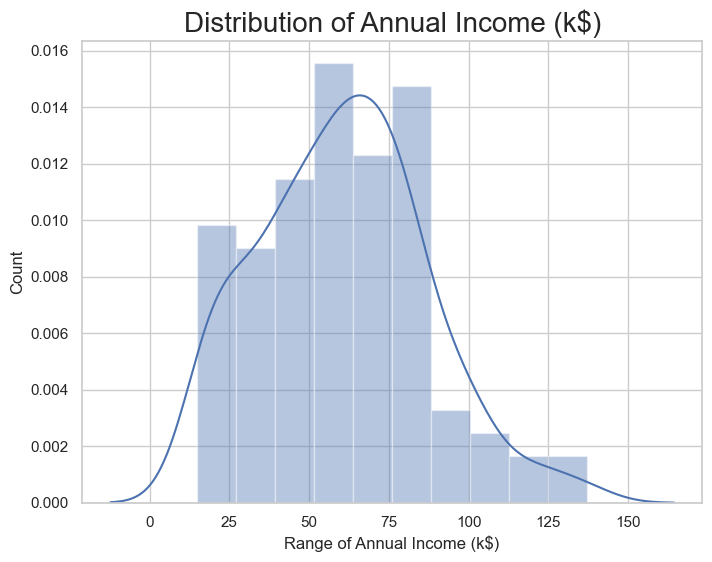

In [19]:
plt.figure(figsize=(8,6))
sns.set(style = 'whitegrid')
sns.distplot(custdf['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

*Most of the annual income falls between 50K to 85K*

## Spending Score Distribution

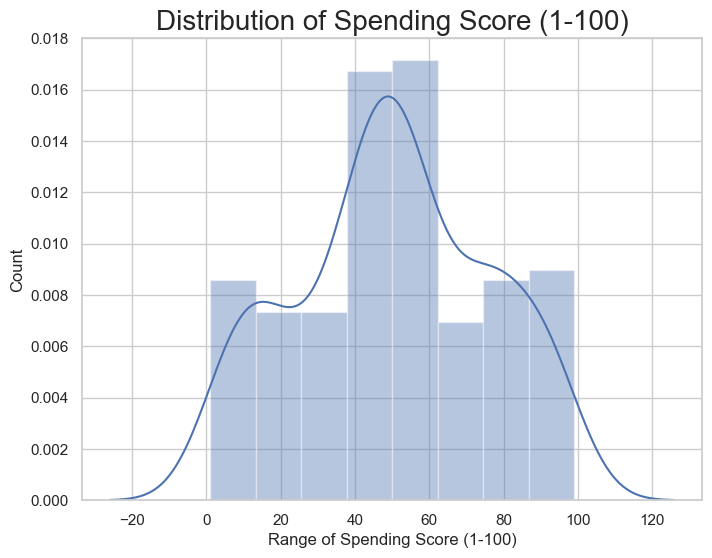

In [20]:
plt.figure(figsize=(8,6))
sns.set(style = 'whitegrid')
sns.distplot(custdf['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

*The maximum spending score is in the range of 40 to 60*

## Gender Analysis

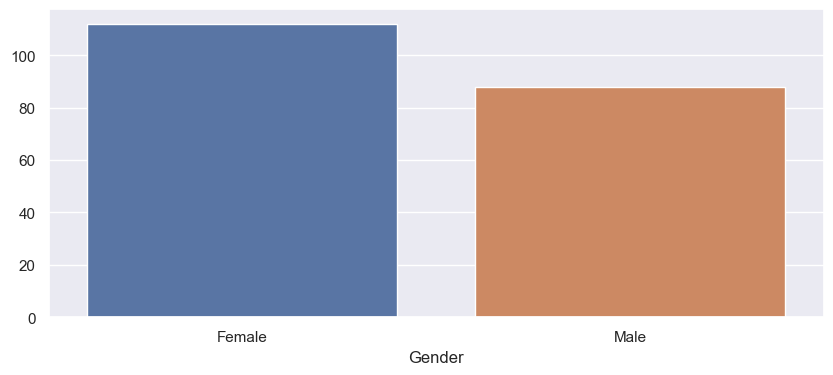

In [21]:
genders = custdf.Gender.value_counts()
sns.set_style('darkgrid')
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

*here most of the customers are females*

In [6]:
x = custdf.iloc[:,[3,4]].values

## Choosing the number of cluster

In [7]:
from sklearn.cluster import KMeans

In [9]:
# WCSS = Within Clusters Sum of Squares

# now, finding wcss value for different number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

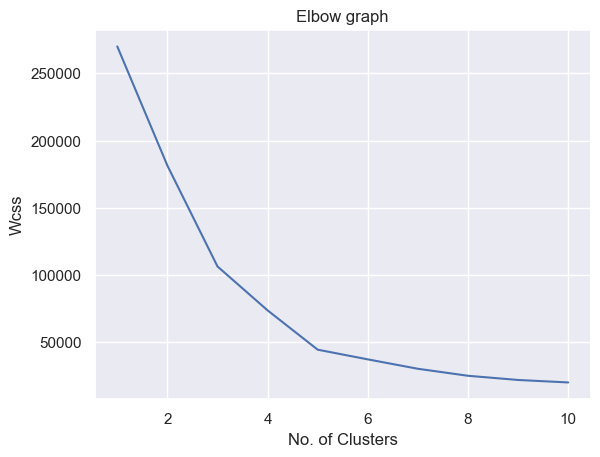

In [11]:
# plot elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('No. of Clusters')
plt.ylabel('Wcss')

plt.show()

## Training the k-means clustering model

In [12]:
# here we take k = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# label for each data point based on their cluster
y = kmeans.fit_predict(x)
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## Visualizing all the clusters

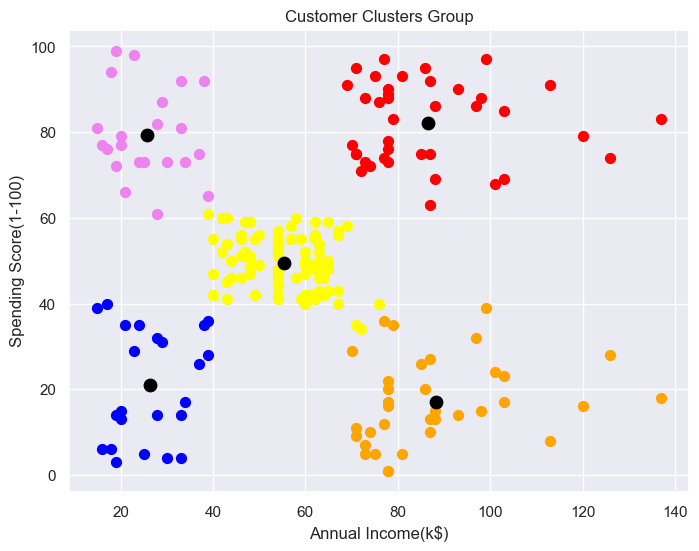

In [17]:
# plotting all the clusters
plt.figure(figsize=(8,6))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='yellow', label='Cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='violet', label='Cluster 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='orange', label='Cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='blue', label='Cluster 5')

# plotting cluster centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=80, c='black', label='Centroids')

plt.title('Customer Clusters Group')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()